# Análisis de datos: Regresión Lineal

El análisis y modelado de datos se basa principalmente en hallar las relaciones entre determinadas variables.
Para ello obtenemos valores de dichas variables a través de procesos de medición.
Luego es necesario inspeccionarlos, para más tarde modelarlos, es decir, intentar hallar una función que los relaciona.

Por ejemplo, consideremos los datos de presión sanguinea vs. la edad de las personas que podemos encontrar en el archivo `blood_pressure.txt`.

Importamos librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Leemos los datos

In [2]:
from pathlib import Path # Definimos el path a la carpeta de datos
data_folder = Path(".") / "data"
blood_pressure_file = data_folder /"blood_pressure.txt"

In [3]:
edad, presion = np.loadtxt(blood_pressure_file, unpack=True)

Visualización de datos

En este caso, ya que los datos son valores _dispersos_, haremos uso de la función `pyplot.scatter` para graficarlos:

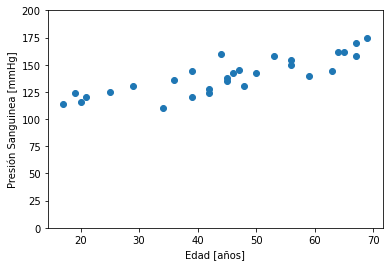

In [4]:
plt.scatter(edad, presion)
plt.ylim(0, 200)
plt.xlabel("Edad [años]")
plt.ylabel("Presión Sanguinea [mmHg]")
plt.show()

A través de la visualización de los datos podemos intuir que existe una relación entre ambas variables. En caso de querer estimar cuál será la presión sanguinea para una edad arbitraria, necesitamos conocer está relación. Para ello necesitamos **modelar** los datos.

## Regresión Lineal

Inicialmente podemos suponer (basado en la visualización de los datos), que  la presión sanguinea se comporta linealmente con la edad de las personas.
Es decir, que podemos escribir a la presión sanguinea en función de la edad de la siguiente manera:

$$ \text{presion}(\text{edad}) = A \cdot \text{edad} + B $$

Donde $A$ y $B$ son parámetros que desconocemos.
Una forma de estimarlos es realizar una **regresión lineal**, la cual consiste en conseguir aquella recta que mejor ajusta a nuestros datos.

Esto se puede realizar a través de la función `linregress` de `scipy.stats`.

In [5]:
from scipy.stats import linregress

In [6]:
linregress?

In [7]:
regresion = linregress(edad, presion)

In [8]:
regresion

LinregressResult(slope=0.9493225373316514, intercept=97.07708426577695, rvalue=0.8439069051978124, pvalue=8.876280872508932e-09, stderr=0.11614451633658138)

In [9]:
print("Pendiente:", regresion.slope)

Pendiente: 0.9493225373316514


In [10]:
print("Término independiente:", regresion.intercept)

Término independiente: 97.07708426577695


In [11]:
print("Coeficiente R^2:", regresion.rvalue ** 2)

Coeficiente R^2: 0.7121788646405496


Grafiquemos los datos junto al ajuste

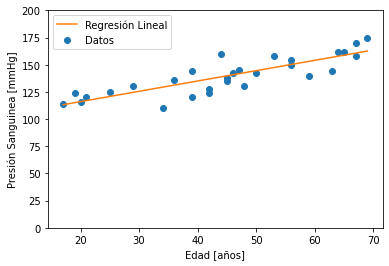

In [12]:
edades_reg = np.array([edad.min(), edad.max()])
presion_reg = regresion.slope * edades_reg + regresion.intercept

plt.scatter(edad, presion, label="Datos")
plt.plot(edades_reg, presion_reg, color="C1", label="Regresión Lineal")
plt.ylim(0, 200)
plt.xlabel("Edad [años]")
plt.ylabel("Presión Sanguinea [mmHg]")
plt.legend()
plt.show()

## Ejercicio

El archivo `blood_pressure.csv` contiene los mismos datos que `blood_pressure.txt`, pero en formato CSV (comma sperated values).

1. Cargar el archivo `blood_pressure.csv` a través de `np.loadtxt`.

> **Ayuda**
>
> Revisar la documentación de `np.loadtxt` sobre cómo modificar el caracter que separa las columnas dentro del archivo que se está leyendo.